In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load microbes csv file
microbeDF = pd.read_csv('microbes.csv')

# Data Cleaning
## Remove first column - Dont need sample ID
del microbeDF[microbeDF.columns[0]]

## Check for any missing data

totalNA = microbeDF.isna().sum().sum()
print((microbeDF[1:5]))
                           

   Solidity  Eccentricity  EquivDiameter  Extrema  FilledArea  Extent  \
1      5.60          18.3           4.14     6.16       0.364    3.51   
2      8.32          19.8           4.63     6.66       0.415    5.85   
3     10.10          17.9           7.29    11.10       1.470    6.30   
4      6.27          20.2          20.10    10.70      14.700    3.97   

   Orientation  EulerNumber  BoundingBox1  BoundingBox2  ...  ConvexHull4  \
1        18.60         22.5          5.41         19.20  ...         5.47   
2        21.00         22.4          5.96         10.20  ...         5.96   
3         9.94         21.9          8.81         10.70  ...         8.88   
4         2.58         11.9         10.20          1.22  ...        10.20   

   MajorAxisLength  MinorAxisLength  Perimeter  ConvexArea  Centroid1  \
1             1.52             1.52      1.010       0.215       6.01   
2             1.63             1.38      1.110       0.182       6.55   
3             2.04           

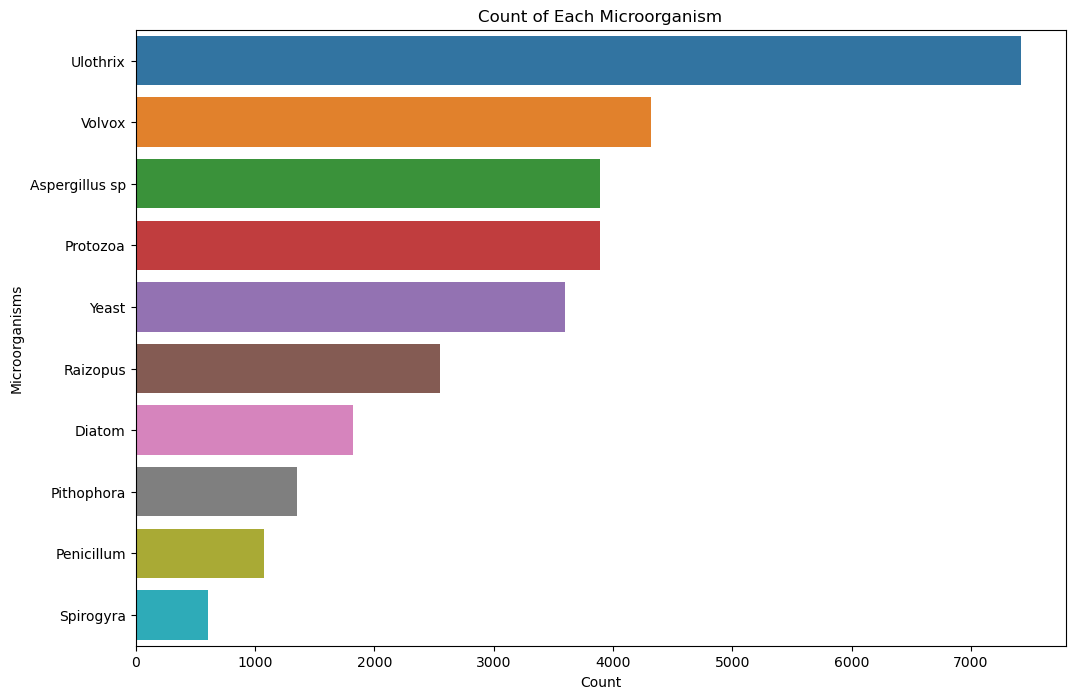

<Axes: xlabel='Solidity', ylabel='Eccentricity'>

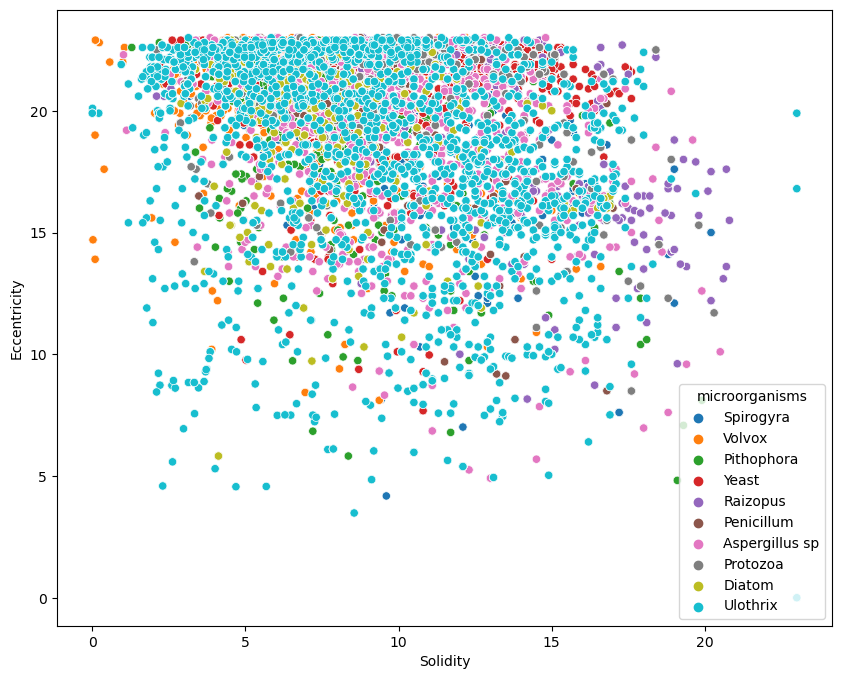

In [23]:
# Data Exploration

# Plot the count of each microorganism
plt.figure(figsize=(12, 8))
sns.countplot(y='microorganisms', data=microbeDF, order=microbeDF['microorganisms'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Microorganisms')
plt.title('Count of Each Microorganism')
plt.show()


# This scatter plot helps visualize the relationship between ‘Solidity’ and ‘Eccentricity’ for different microorganisms, 
# making it easier to see how these features vary across different classes
plt.figure(figsize = (10, 8), dpi = 100)
sns.scatterplot(data = microbeDF, x = 'Solidity', y = 'Eccentricity', hue = 'microorganisms')

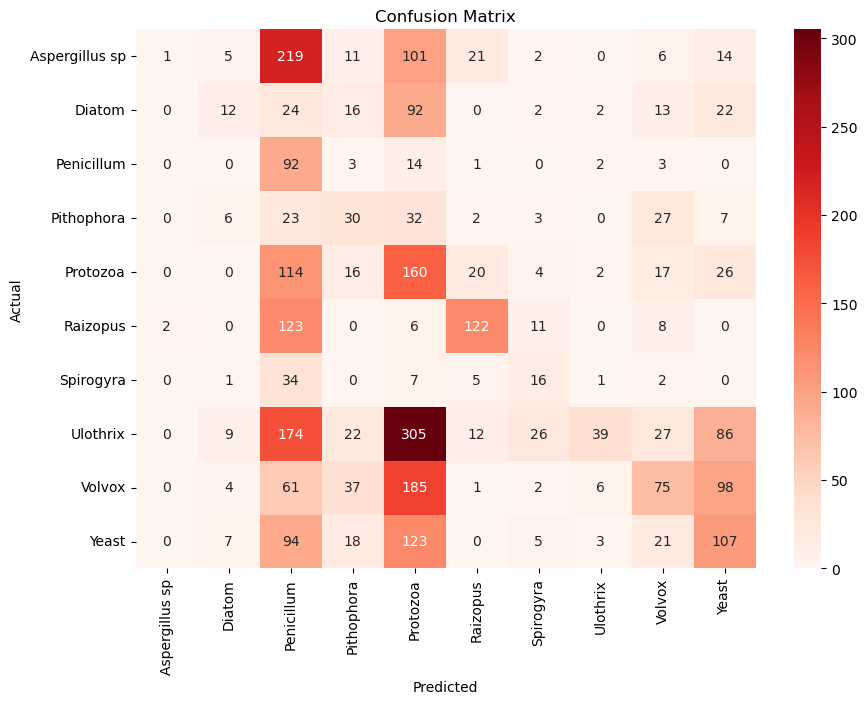

Average accuracy: 0.20889724950943128


In [16]:
# Naive-Bayes Model
## Set up K-Fold Cross Validation - 10 Splits

# Create features and labels
X = microbeDF.drop('microorganisms', axis=1)  # Features
y = microbeDF['microorganisms']  # Target

# Initialize KFold
kf = KFold(n_splits=10, shuffle=True, random_state=275)

# Initialize Naive Bayes classifier
gnb = GaussianNB()

# Lists to store results
accuracy_list = []
confusion_matrices = []

# Perform 10-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    gnb.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = gnb.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    
# Plot Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print results
print(f'Average accuracy: {np.mean(accuracy_list)}')


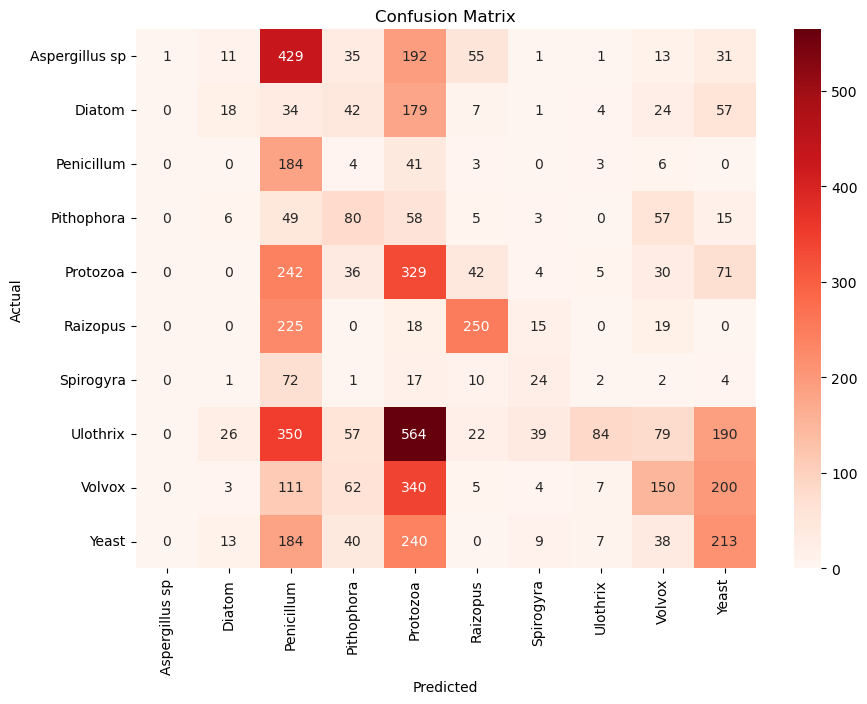

Average accuracy: 0.2101421863753996


In [17]:
# Naive Bayes Model 2 - 5 splits 

kf = KFold(n_splits= 5, shuffle=True, random_state=275)

# Initialize Naive Bayes classifier
gnb = GaussianNB()

# Lists to store results
accuracy_list = []
confusion_matrices = []

# Perform 5-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    gnb.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = gnb.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

# Plot Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print results
print(f'Average accuracy: {np.mean(accuracy_list)}')


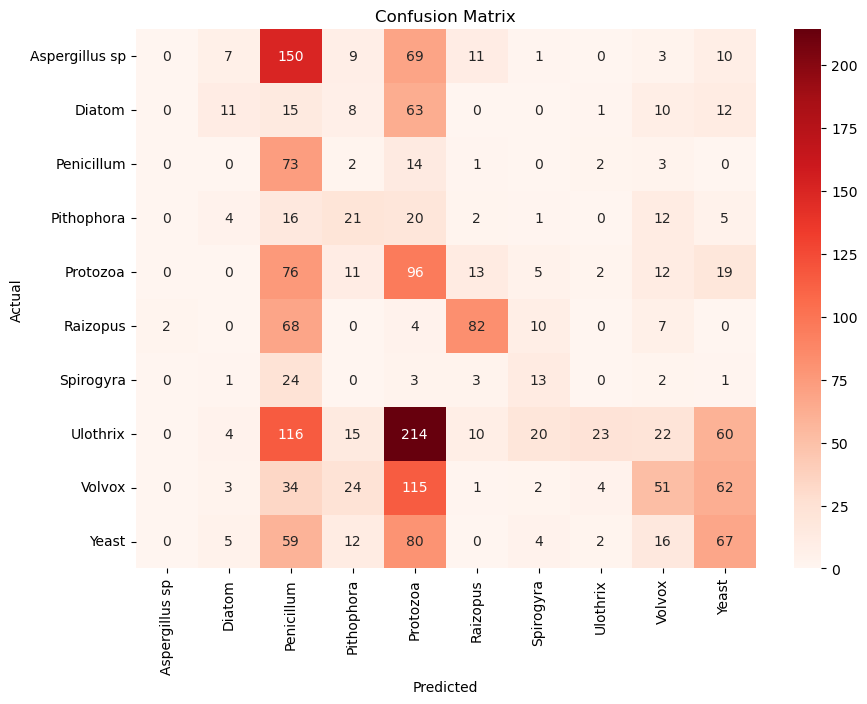

Average accuracy: 0.20866818238134544


In [15]:
# Naive Bayes Model 3 - 15 splits 

kf = KFold(n_splits=15, shuffle=True, random_state=275)

# Initialize Naive Bayes classifier
gnb = GaussianNB()

# Lists to store results
accuracy_list = []
confusion_matrices = []

# Perform 15-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    gnb.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = gnb.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    
# Plot Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print results
print(f'Average accuracy: {np.mean(accuracy_list)}')


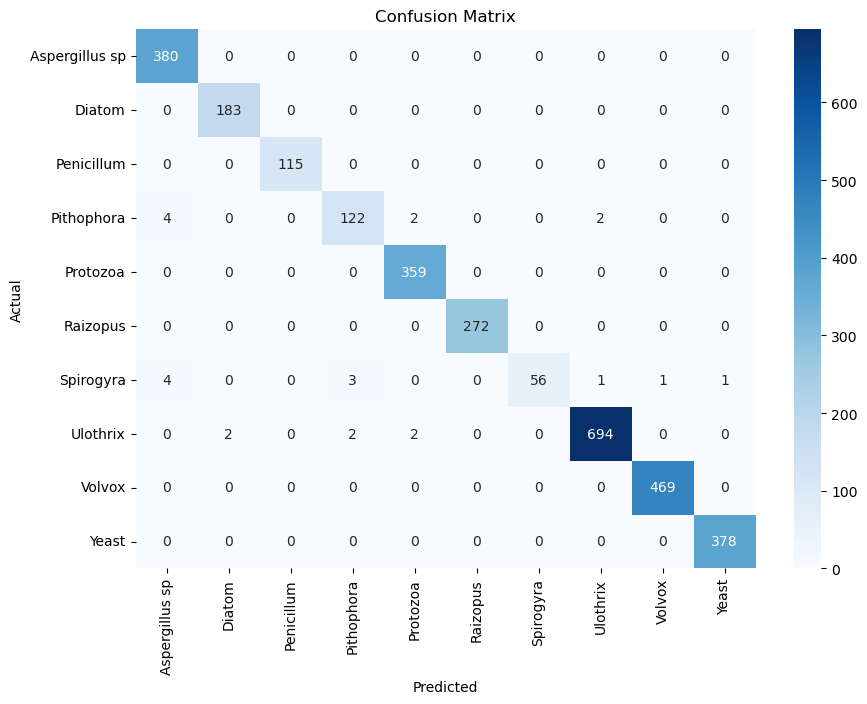

Average accuracy: 0.9918760804640089


In [13]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Model

# Initialize KFold
kf = KFold(n_splits=10, shuffle=True, random_state=275)

# Initialize Decision Tree classifier
dtc = DecisionTreeClassifier(random_state=275)

# Lists to store results
accuracy_list = []
confusion_matrices = []

# Perform 10-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    dtc.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = dtc.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    
# Plot Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print results
print(f'Average accuracy: {np.mean(accuracy_list)}')

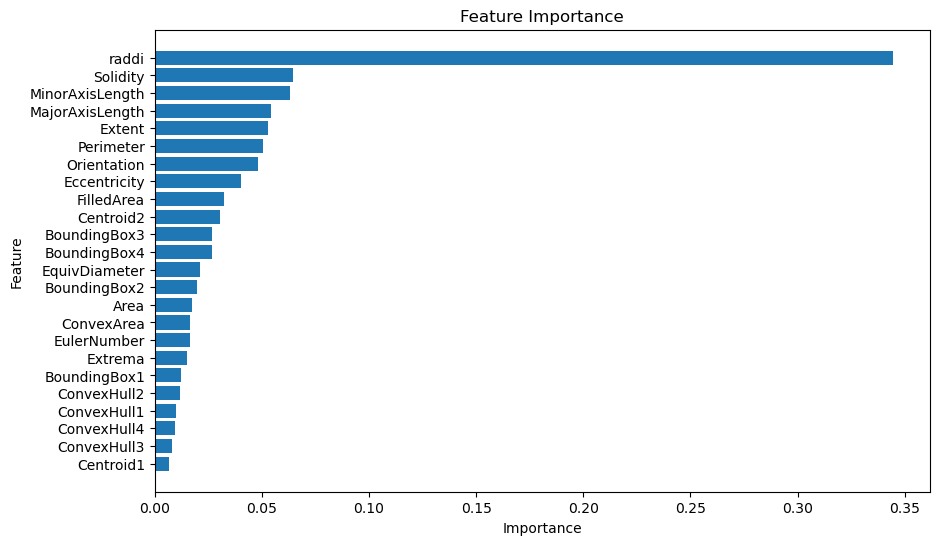

In [6]:
import matplotlib.pyplot as plt

# Get feature importance
feature_importance = dtc.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


Validation accuracy: 0.9888634130363577


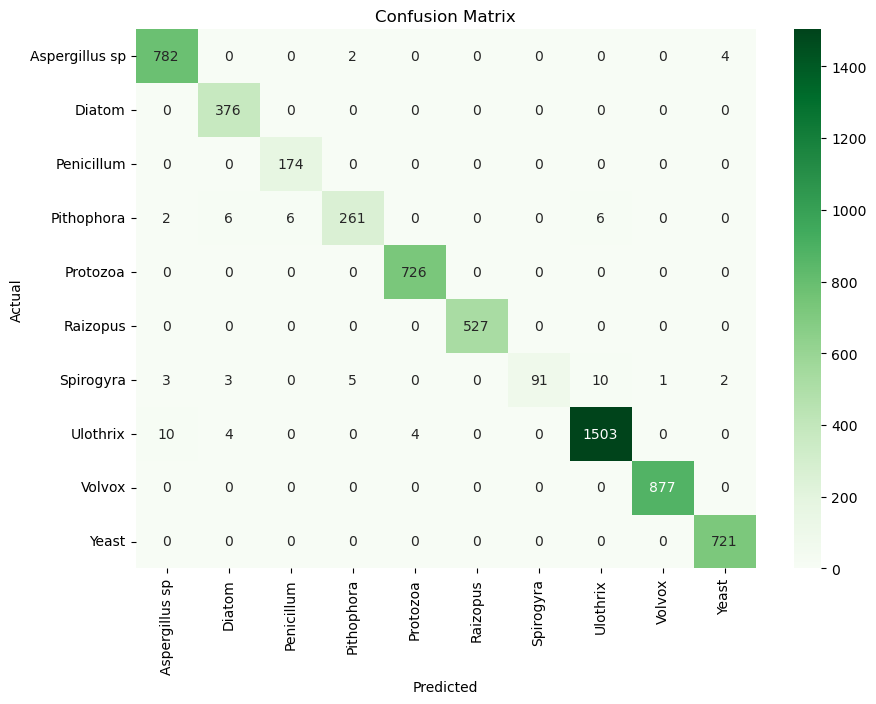

Classification report:
                precision    recall  f1-score   support

Aspergillus sp       0.98      0.99      0.99       788
        Diatom       0.97      1.00      0.98       376
    Penicillum       0.97      1.00      0.98       174
    Pithophora       0.97      0.93      0.95       281
      Protozoa       0.99      1.00      1.00       726
      Raizopus       1.00      1.00      1.00       527
     Spirogyra       1.00      0.79      0.88       115
      Ulothrix       0.99      0.99      0.99      1521
        Volvox       1.00      1.00      1.00       877
         Yeast       0.99      1.00      1.00       721

      accuracy                           0.99      6106
     macro avg       0.99      0.97      0.98      6106
  weighted avg       0.99      0.99      0.99      6106



In [14]:
# Validating Decision Tree model to ensure that high accuracy is not due to overfitting.

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=275)

# Initialize Decision Tree classifier
dtc = DecisionTreeClassifier(random_state=275)

# Train the model
dtc.fit(X_train, y_train)

# Predict on the validation set
y_pred = dtc.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation accuracy: {accuracy}')

# Calculate confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report = classification_report(y_val, y_pred)
print(f'Classification report:\n{report}')